In [31]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

movie=pd.read_csv("/Users/praga/Downloads/data/movie_metadata.csv")
movie.head(6)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


In [16]:
movie.columns

Index([u'color', u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes'],
      dtype='object')

In [18]:
movie.shape

(5043, 28)

In [17]:
movie.describe(include=["object"])

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
count,5024,4939,5030,5043,5036,5043,5020,4890,5043,5031,5038,4740
unique,2,2398,3032,914,2097,4917,3521,4760,4919,47,65,18
top,Color,Steven Spielberg,Morgan Freeman,Drama,Robert De Niro,Halloween,Steve Coogan,based on novel,http://www.imdb.com/title/tt0077651/?ref_=fn_t...,English,USA,R
freq,4815,26,20,236,49,3,8,4,3,4704,3807,2118


-  We can see that 4815 movies are colored and rest are black-white.
-  Steven Spielberg is featured 26 times as the director in our dataset.
-  Drama genre is most prominent with frequency count of 236.
-  Movies from the USA dominated the dataset as 3807 movies are from this country.

## Data Filtering and Cleaning

In [20]:
movie_num=movie.select_dtypes(exclude=['object'])

In [51]:
movie_num.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,0.0,0.0,131.0,0.0,131.0,0.0,8,143,0.0,0.0,0.0,0.0,12.0,7.1,0.00,0


In [22]:
movie_num.isnull().sum()

num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_1_facebook_likes         7
gross                        884
num_voted_users                0
cast_total_facebook_likes      0
facenumber_in_poster          13
num_user_for_reviews          21
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [24]:
movie_num=movie_num.fillna(0,axis=1)
movie_num.isnull().sum()

num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_1_facebook_likes       0
gross                        0
num_voted_users              0
cast_total_facebook_likes    0
facenumber_in_poster         0
num_user_for_reviews         0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

### Standardisation

In [25]:
X = movie_num.values
# Data Normalization
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

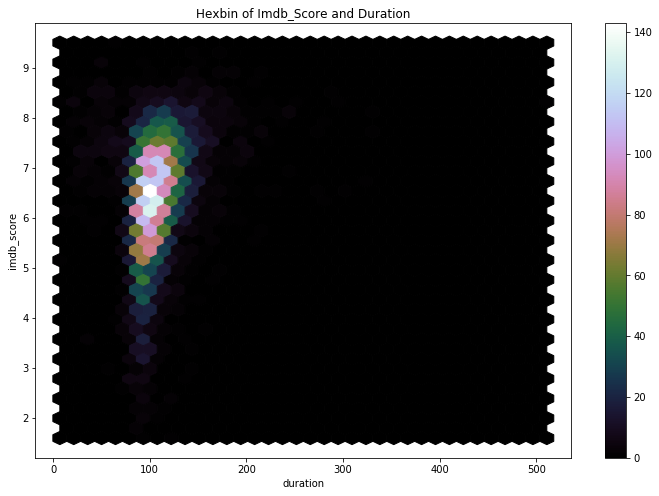

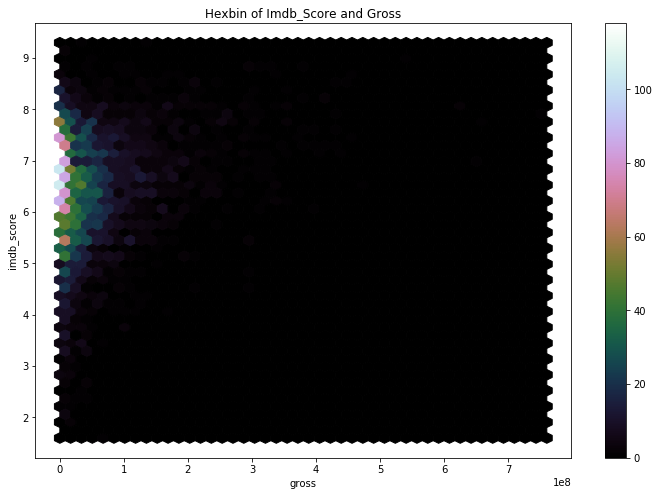

In [26]:
movie.plot(y= 'imdb_score', x ='duration',kind='hexbin',gridsize=35, sharex=False, colormap='cubehelix', title='Hexbin of Imdb_Score and Duration',figsize=(12,8))
movie.plot(y= 'imdb_score', x ='gross',kind='hexbin',gridsize=45, sharex=False, colormap='cubehelix', title='Hexbin of Imdb_Score and Gross',figsize=(12,8))

In the hexbin plots, the lighter in color the hexagonal pixels, the more correlated one feature is to another.

In [35]:
corrmat=movie_num.corr()
corrmat['imdb_score']

num_critic_for_reviews       0.299677
duration                     0.256352
director_facebook_likes      0.162468
actor_3_facebook_likes       0.051900
actor_1_facebook_likes       0.075833
gross                        0.176445
num_voted_users              0.410965
cast_total_facebook_likes    0.085787
facenumber_in_poster        -0.062211
num_user_for_reviews         0.289780
budget                       0.025768
title_year                  -0.156090
actor_2_facebook_likes       0.083402
imdb_score                   1.000000
aspect_ratio                 0.094200
movie_facebook_likes         0.247049
Name: imdb_score, dtype: float64

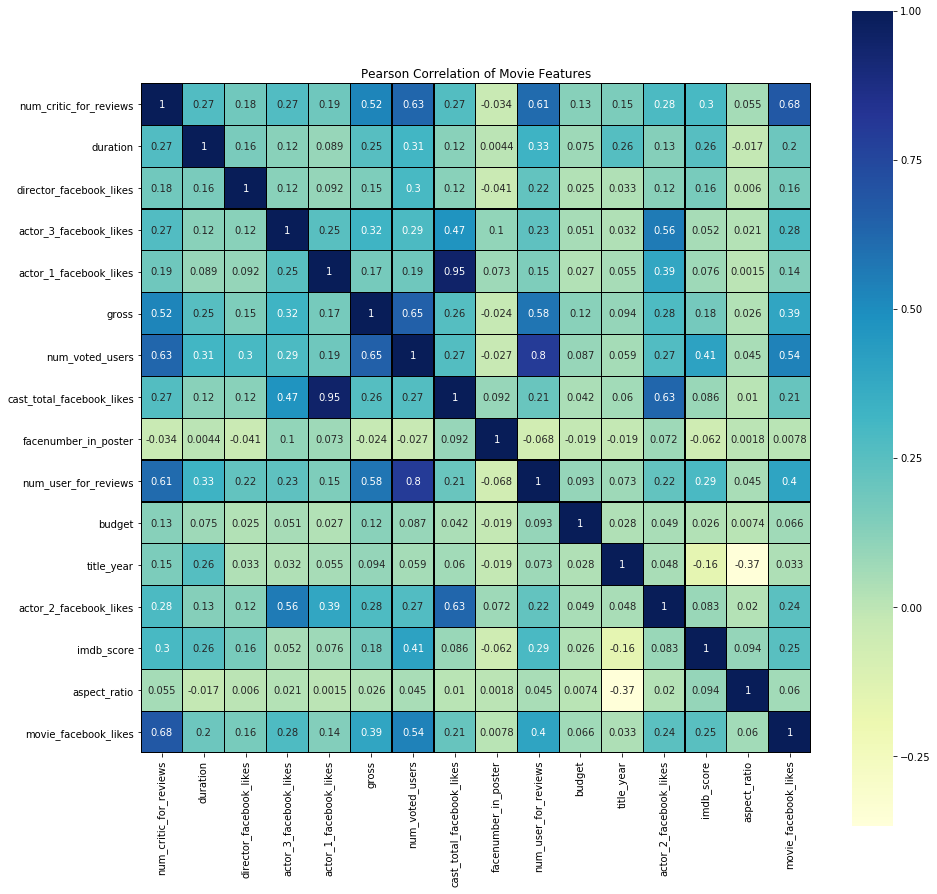

In [41]:
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of Movie Features')


sns.heatmap(corrmat,linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

As we can see from the heatmap, there are regions (features) where we can see quite positive linear correlations amongst each other, given the darker shade of the colours - top left-hand corner and bottom right quarter. This is a good sign as it means we may be able to find linearly correlated features for which we can perform PCA projections on.

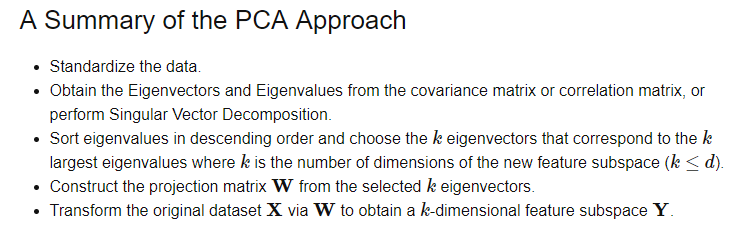

## Explained Variance Measure

In [52]:
# Calculating Eigenvectors and eigenvalues of Cov matrix
mean_vec = np.mean(X_std, axis=0)
cov_mat_1 = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat_1)

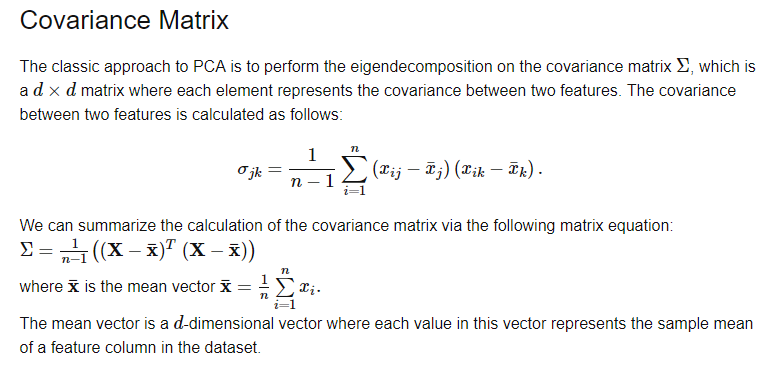

In [53]:
print(mean_vec.shape)

z=X_std-mean_vec
print(z.shape)

(16L,)
(5043L, 16L)


In [54]:
print(X_std.shape)
print(cov_mat.shape)
print(cov_mat_1.shape)

(5043L, 16L)
(16L, 16L)
(16L, 16L)


Now having obtained the eigenvalues and eigenvectors, we will group them together by creating a list of eigenvalue, eigenvector tuples. Following on from this we will sort the list in order of Highest eigenvalue to lowest eigenvalue and then use the eigenvalues to calculate both the individual explained variance and the cumulative explained variance for visualisation

In [55]:
eig_vals

array([4.48895421e+00, 2.06396821e+00, 1.47239049e+00, 1.64485837e-03,
       1.47584860e-01, 2.78960462e-01, 4.04205619e-01, 4.22790205e-01,
       4.82895038e-01, 1.06549612e+00, 7.34773161e-01, 7.69675198e-01,
       8.21093952e-01, 8.95830522e-01, 9.96934303e-01, 9.55976134e-01])

In [56]:
eig_vecs

array([[-3.65207243e-01,  1.84904784e-01,  2.41996546e-02,
         1.09830380e-03,  2.61638847e-01, -7.42012485e-01,
         1.89517815e-02,  1.12540365e-01, -7.94965637e-02,
        -1.55012572e-01, -3.38355583e-01,  7.16188737e-02,
        -1.29792359e-01, -1.42899850e-01, -1.00979707e-02,
         1.11599220e-01],
       [-2.00923379e-01,  1.39813398e-01,  2.51608721e-01,
        -1.26531283e-03,  6.38099746e-02, -3.85956401e-02,
        -3.18764486e-02,  5.69389084e-02,  4.73165711e-01,
         2.68432124e-01, -1.23906173e-01, -1.32465329e-01,
         5.53128810e-01, -1.01466939e-01,  1.00160916e-01,
        -4.60253570e-01],
       [-1.57488211e-01,  8.10640197e-02,  3.23503420e-03,
         1.95532816e-05, -5.47088134e-02, -6.57562865e-02,
        -7.57883319e-02, -4.26676321e-02,  2.54620768e-03,
         4.19998009e-01, -1.59726885e-01, -1.46967359e-01,
        -3.54983649e-01,  7.55866154e-01,  1.11301423e-01,
        -1.43116551e-01],
       [-2.55649644e-01, -2.65931877e

In [57]:
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

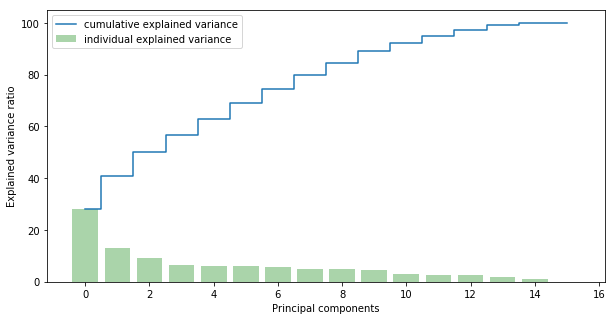

In [58]:
plt.figure(figsize=(10, 5))
plt.bar(range(16), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(16), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

From the plot above, it can be seen that approximately 90% of the variance can be explained with the 9 principal components.

# Principal Component Analysis

Having roughly identified how many components/dimensions we would like to project on, let's now implement sklearn's PCA module.

In [59]:
pca = PCA(n_components=9)
x_9d = pca.fit_transform(X_std)

 Let's visualise the first 2 projection components as a 2D scatter plot to see if we can get a quick feel for the underlying data.

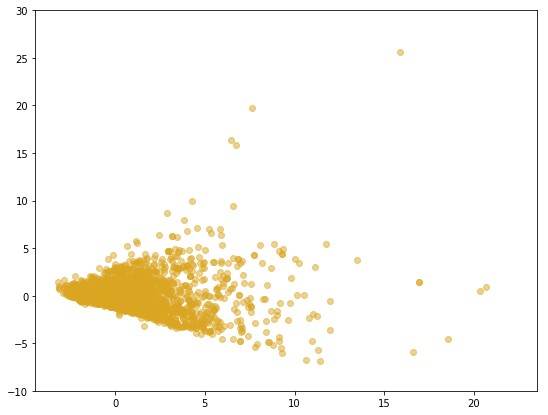

In [60]:
plt.figure(figsize = (9,7))
plt.scatter(x_9d[:,0],x_9d[:,1], c='goldenrod',alpha=0.5)
plt.ylim(-10,30)
plt.show()

 From the 2D plot above of the first 2 PCA projections, the first visual impression is that there does not seem to be any discernible clusters. However keeping in mind that our PCA projections contain another 7 components, perhaps looking at plots with the other components may be fruitful.

# K-mean Clustering

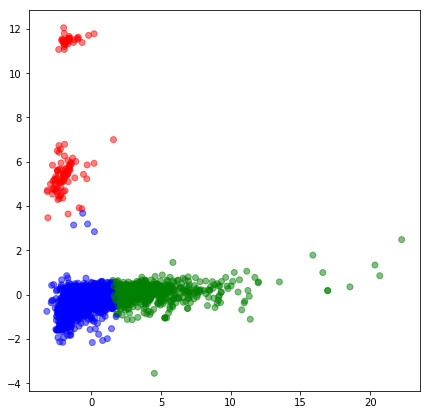

In [68]:
kmeans = KMeans(n_clusters=3)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_9d)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_9d[:,0],x_9d[:,2], c= label_color, alpha=0.5) 
plt.show()

In [69]:
df = pd.DataFrame(x_9d)
df = df[[0,1,2]] # only want to visualise relationships between first 3 projections
df['X_cluster'] = X_clustered

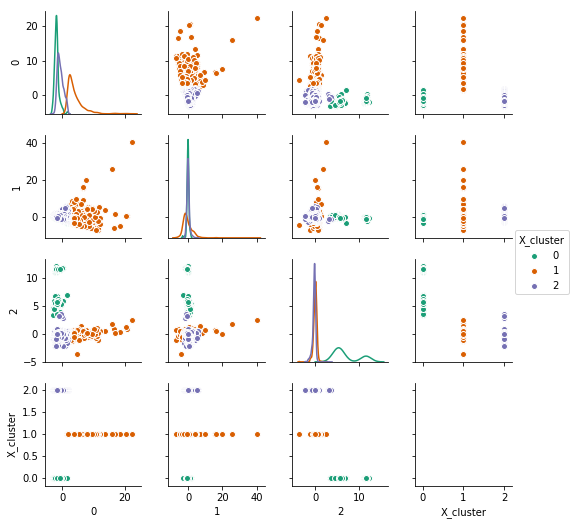

In [70]:
sns.pairplot(df, hue='X_cluster', palette= 'Dark2', diag_kind='kde',size=1.85)
